# Model training




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
path = "/content/drive/MyDrive/SEM 07 AKSHILMY/Machine Learning-S7-CS4622/ML Lab 01"
os.chdir(path)

In [3]:
%pip install pandas scikit-learn

In [4]:
import pandas as pd

In [5]:
train_data = pd.read_csv("train.csv")
val_data = pd.read_csv("valid.csv")

In [6]:
train_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.133276,1.000378,-0.429316,0.313957,3.004676,-0.430012,-1.406885,1.003829,2.446188,-1.267793,...,0.739990,-1.008707,0.876191,-0.219648,1.413330,-0.943048,39,29.0,1,6
28516,1.422285,-1.332320,-0.146487,0.261297,0.424878,-0.724837,0.751165,-1.497327,0.764382,-1.836306,...,-0.188780,0.362157,1.592062,-1.854311,1.864250,-2.102834,39,29.0,1,6
28517,1.133093,-0.632685,-0.055843,0.771494,1.286218,-0.022827,0.100600,0.701797,1.211175,-1.189144,...,1.118152,-2.058771,2.761125,0.410838,0.348411,-1.981375,39,29.0,1,6
28518,-0.994910,-0.621460,-0.205676,-0.684337,1.090212,-1.194920,-0.032449,-0.441138,1.198641,-2.830740,...,0.704228,-0.434955,1.891357,-1.680577,-0.767429,-1.770626,39,29.0,1,6


In [7]:
train_data1 = train_data.drop(["label_2","label_3","label_4"],axis =1)
train_data2 = train_data.drop(["label_1","label_3","label_4"],axis =1)
train_data3 = train_data.drop(["label_1","label_2","label_4"],axis =1)
train_data4 = train_data.drop(["label_1","label_2","label_3"],axis =1)

## Feature Selection

In [8]:
X = train_data.drop(["label_1","label_2","label_3","label_4"],axis =1)
Y = train_data["label_1"]

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)

model.fit(X,Y)


RandomForestClassifier(n_estimators=340)

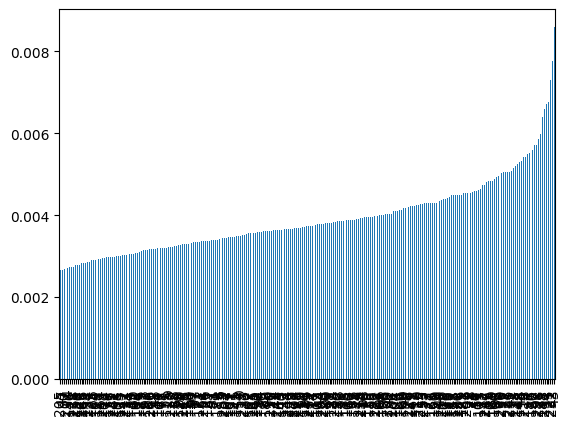

In [10]:

importances = model.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns,"Importances": importances})
final_df.set_index("Importances")

final_df = final_df.sort_values('Importances')
import matplotlib.pyplot as plt
final_df['Importances'].plot(kind='bar')
plt.show()

In [11]:
X_val = val_data.drop(["label_1","label_2","label_3","label_4"],axis =1)
Y_val = val_data["label_1"]

In [12]:
accuracy = model.score(X_val,Y_val)
accuracy

0.98

## Dropping features

In [23]:
# Getting only more important features
threshold = 0.0031 #0.0035  # Set your desired threshold value here
filtered_df = final_df[final_df['Importances'] > threshold]
important_features = list(filtered_df['Features'])
len(important_features)

214

In [24]:
X_1 = train_data[important_features]
Y_1 = train_data["label_1"]

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)

model.fit(X_1,Y_1)


RandomForestClassifier(n_estimators=340)

In [26]:
X_val_1 = val_data[important_features]
Y_val_1 = val_data["label_1"]

In [27]:
label1_accuracy = model.score(X_val_1,Y_val_1)
label1_accuracy

0.9813333333333333

In [ ]:
assert (label1_accuracy - accuracy) > 0